# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load dataset

In [2]:
df=pd.read_csv(r'C:\Users\Mahaveer\Downloads\train.csv', encoding = 'ISO-8859-1')
df.head(3)

C:\Users\Mahaveer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (11,12,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [3]:
df.columns

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'violation_zip_code', 'mailing_address_str_number',
       'mailing_address_str_name', 'city', 'state', 'zip_code',
       'non_us_str_code', 'country', 'ticket_issued_date', 'hearing_date',
       'violation_code', 'violation_description', 'disposition', 'fine_amount',
       'admin_fee', 'state_fee', 'late_fee', 'discount_amount',
       'clean_up_cost', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance'],
      dtype='object')

# EDA

In [4]:
df = df[df.compliance >= 0]
df.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0


In [5]:
df= df[['fine_amount', 'admin_fee', 'state_fee', 'late_fee', 'discount_amount', 'judgment_amount','compliance']]

In [6]:
df.head()

,fine_amount,admin_fee,state_fee,late_fee,discount_amount,judgment_amount,compliance
0,250.0,20.0,10.0,25.0,0.0,305.0,0.0
1,750.0,20.0,10.0,75.0,0.0,855.0,1.0
5,250.0,20.0,10.0,25.0,0.0,305.0,0.0
6,750.0,20.0,10.0,75.0,0.0,855.0,0.0
7,100.0,20.0,10.0,10.0,0.0,140.0,0.0


In [7]:
X = df[['fine_amount', 'admin_fee', 'state_fee', 'late_fee', 'discount_amount', 'judgment_amount']].values

In [8]:
y= df[['compliance']].values

# Loading modules in Scikit learn

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [11]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [12]:
from sklearn.metrics import classification_report

In [13]:
#from sklearn.preprocessing import MinMaxScaler

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

# Logistic Regression

In [90]:
lg= LogisticRegression().fit(X_train,np.ravel(y_train))

In [16]:
lg_pred= lg.predict(X_test)

In [17]:
classification_report(y_test,lg_pred,target_names=['not1','1'])

'              precision    recall  f1-score   support\n\n        not1       0.93      1.00      0.97     37078\n           1       0.81      0.10      0.17      2892\n\n    accuracy                           0.93     39970\n   macro avg       0.87      0.55      0.57     39970\nweighted avg       0.93      0.93      0.91     39970\n'

In [18]:
print('accuracy::',accuracy_score(y_test,lg_pred))
print('precision::',precision_score(y_test,lg_pred))
print('recall::',recall_score(y_test,lg_pred))

accuracy:: 0.9329497122842132
precision:: 0.8117647058823529
recall:: 0.0954356846473029


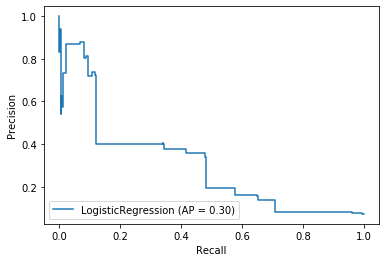

In [19]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(lg, X_test, y_test)

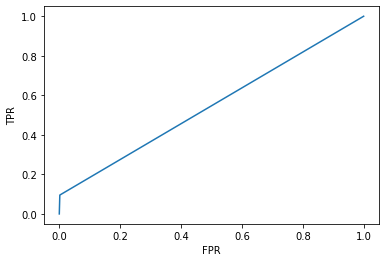

In [20]:
from sklearn import metrics
y_pred_proba = lg.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  lg_pred)
auc = metrics.roc_auc_score(y_test, lg_pred)
plt.plot(fpr,tpr)
#plt.legend(loc=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,  lg_pred)

0.5468547968519432

# SVM

In [91]:
svm=SVC(kernel='rbf',gamma=10,C=10).fit(X_train,np.ravel(y_train))

In [47]:
svm_pred= svm.predict(X_test)

In [48]:
print('accuracy::',accuracy_score(y_test,svm_pred))
print('precision::',precision_score(y_test,svm_pred))
print('recall::',recall_score(y_test,svm_pred))

accuracy:: 0.9345759319489617
precision:: 0.9511400651465798
recall:: 0.10096818810511757


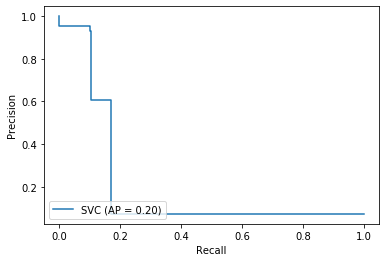

In [49]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(svm, X_test, y_test)

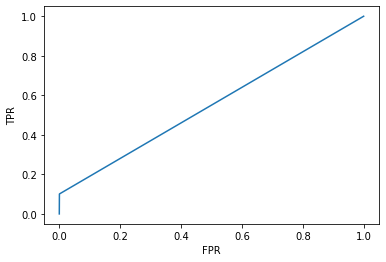

In [50]:
from sklearn import metrics
#y_pred_proba = svm.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  svm_pred)
auc = metrics.roc_auc_score(y_test, svm_pred)
plt.plot(fpr,tpr)
#plt.legend(loc=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [51]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,  svm_pred)

0.5502818177701272

# Decison Tree

In [37]:
dclf=DecisionTreeClassifier(max_depth=4).fit(X_train,y_train)

In [44]:
dclf_pred=dclf.predict(X_test)

In [45]:
print('accuracy::',accuracy_score(y_test,dclf_pred))
print('precision::',precision_score(y_test,dclf_pred))
print('recall::',recall_score(y_test,dclf_pred))

accuracy:: 0.9345759319489617
precision:: 0.9511400651465798
recall:: 0.10096818810511757


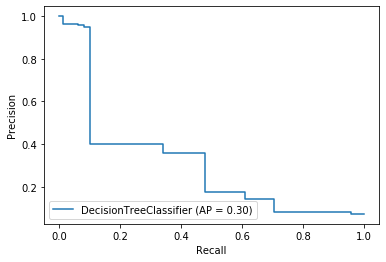

In [52]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(dclf, X_test, y_test)

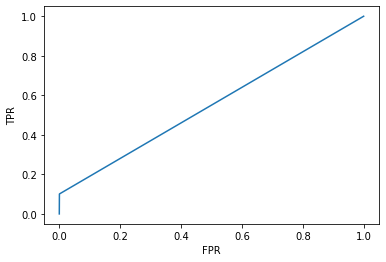

In [53]:
from sklearn import metrics
#y_pred_proba = svm.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  dclf_pred)
auc = metrics.roc_auc_score(y_test, dclf_pred)
plt.plot(fpr,tpr)
#plt.legend(loc=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [54]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,  dclf_pred)

0.5502818177701272

# Naive bayes

In [92]:
nbclf=GaussianNB().fit(X_train,np.ravel(y_train))

In [56]:
nbclf_pred=nbclf.predict(X_test)

In [57]:
print('accuracy::',accuracy_score(y_test,nbclf_pred))
print('precision::',precision_score(y_test,nbclf_pred))
print('recall::',recall_score(y_test,nbclf_pred))

accuracy:: 0.9337503127345509
precision:: 0.9452554744525548
recall:: 0.08955739972337483


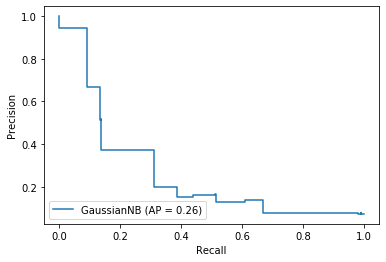

In [58]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(nbclf, X_test, y_test)

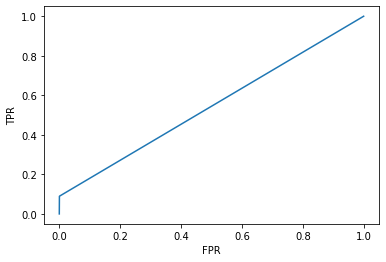

In [59]:
from sklearn import metrics
#y_pred_proba = svm.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  nbclf_pred)
auc = metrics.roc_auc_score(y_test, nbclf_pred)
plt.plot(fpr,tpr)
#plt.legend(loc=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [60]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,  nbclf_pred)

0.5445764235792557

# Random Forest

In [93]:
rm=RandomForestClassifier(random_state=0,n_estimators=100).fit(X_train,np.ravel(y_train))

In [70]:
rm_pred=rm.predict(X_test)

In [71]:
print('accuracy::',accuracy_score(y_test,rm_pred))
print('precision::',precision_score(y_test,rm_pred))
print('recall::',recall_score(y_test,rm_pred))

accuracy:: 0.9346259694771079
precision:: 0.9456869009584664
recall:: 0.10235131396957123


In [72]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,  nbclf_pred)

0.5445764235792557

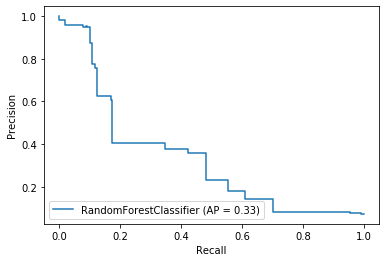

In [73]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(rm, X_test, y_test)

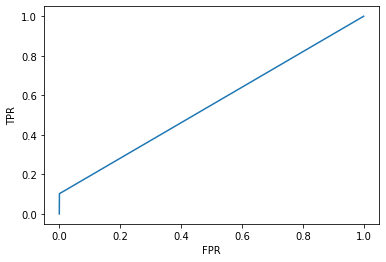

In [74]:
from sklearn import metrics
y_pred_proba = rm.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  rm_pred)
auc = metrics.roc_auc_score(y_test, rm_pred)
plt.plot(fpr,tpr)
#plt.legend(loc=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Neural network

In [86]:
clf=MLPClassifier(hidden_layer_sizes=[100,100,100],activation='tanh').fit(X_train,np.ravel(y_train))

In [87]:
clf_pred=clf.predict(X_test)

In [88]:
print('accuracy::',accuracy_score(y_test,clf_pred))
print('precision::',precision_score(y_test,clf_pred))
print('recall::',recall_score(y_test,clf_pred))

accuracy:: 0.9345759319489617
precision:: 0.9511400651465798
recall:: 0.10096818810511757


In [89]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,  clf_pred)

0.5502818177701272

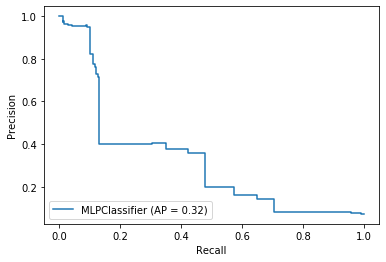

In [94]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(clf, X_test, y_test)

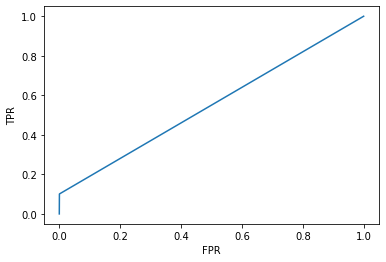

In [95]:
from sklearn import metrics
y_pred_proba = clf.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,  clf_pred)
auc = metrics.roc_auc_score(y_test, clf_pred)
plt.plot(fpr,tpr)
#plt.legend(loc=4)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()